#Letter-Recognition



# **About Dataset**
To solve an interesting letter recognition problem using SVMs. It contains the 26 English alphabets as classes, so it's a multiclass classification problem with 26 classes.

Each row in the data set represents an image of a handwritten alphabet. Using some basic image processing, the images are converted into m X n pixels, where m and n depend on the size and resolution of the original image. Each pixel contains numeric values, with higher values denoting the presence of dense 'ink'. In the pixels where nothing is written, the pixel value is 0.

A pixel is called 'on' if it contains to a positive numeric value, else it is called 'off'.

Using the pixelated images, 16 features are derived for each image, such as the width of the box, the ratio of the mean variance of x divided by the width of the box, etc.

# Importing libraries

In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix

LOAD THE DATASET

In [466]:
df = pd.read_csv("letter-recognition.csv")
df=pd.DataFrame(df)

DISPLAY BASIC INFORMATION

In [467]:
print("first 5 rows")
print(df.head(5))

first 5 rows
  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  


In [468]:
print("last 5 rows")
print(df.tail(5))

last 5 rows
      letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  \
19995      D      2      2       3       3       2      7      7      7   
19996      C      7     10       8       8       4      4      8      6   
19997      T      6      9       6       7       5      6     11      3   
19998      S      2      3       4       2       1      8      7      2   
19999      A      4      9       6       6       2      9      5      3   

       y2bar   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
19995       6       6       6       4       2       8       3       7  
19996       9      12       9      13       2       9       3       7  
19997       7      11       9       5       2      12       2       4  
19998       6      10       6       8       1       9       5       8  
19999       1       8       1       8       2       7       2       8  


In [469]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [470]:
print(df.describe())

              xbox          ybox         width        height        onpix   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              xbar          ybar          x2bar        y2bar         xybar   \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [471]:
print(df.isnull().sum())


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [472]:
df.duplicated().sum()

np.int64(1332)

In [473]:
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [474]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [475]:
df.shape

(18668, 17)

In [476]:
x=df.drop(["letter"],axis=1)
y=df["letter"]

In [477]:
print(x)

       xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0          2      8       3       5       1      8     13      0       6   
1          5     12       3       7       2     10      5      5       4   
2          4     11       6       8       6     10      6      2       6   
3          7     11       6       6       3      5      9      4       6   
4          2      1       3       1       1      8      6      6       6   
...      ...    ...     ...     ...     ...    ...    ...    ...     ...   
19994      5      8       7       7       7      7      9      4       8   
19995      2      2       3       3       2      7      7      7       6   
19996      7     10       8       8       4      4      8      6       9   
19997      6      9       6       7       5      6     11      3       7   
19999      4      9       6       6       2      9      5      3       1   

       xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0           6      10  

In [478]:
print(y)

0        T
1        I
2        D
3        N
4        G
        ..
19994    T
19995    D
19996    C
19997    T
19999    A
Name: letter, Length: 18668, dtype: object


In [479]:
df_pandas_encoder=pd.get_dummies(df,columns=["letter"])


encode=OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=["object"]).columns.tolist()
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encode.fit_transform(df[categorical_columns])
one_hot_df=pd.DataFrame(one_hot_encoded,columns=encode.get_feature_names_out(categorical_columns))

df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),one_hot_df],axis=1)

print(f"one hot encoded using scikit learn : \n {df_sklearn_encoded}\n ")


one hot encoded using scikit learn : 
        xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0        2.0    8.0     3.0     5.0     1.0    8.0   13.0    0.0     6.0   
1        5.0   12.0     3.0     7.0     2.0   10.0    5.0    5.0     4.0   
2        4.0   11.0     6.0     8.0     6.0   10.0    6.0    2.0     6.0   
3        7.0   11.0     6.0     6.0     3.0    5.0    9.0    4.0     6.0   
4        2.0    1.0     3.0     1.0     1.0    8.0    6.0    6.0     6.0   
...      ...    ...     ...     ...     ...    ...    ...    ...     ...   
18594    NaN    NaN     NaN     NaN     NaN    NaN    NaN    NaN     NaN   
18600    NaN    NaN     NaN     NaN     NaN    NaN    NaN    NaN     NaN   
18604    NaN    NaN     NaN     NaN     NaN    NaN    NaN    NaN     NaN   
18632    NaN    NaN     NaN     NaN     NaN    NaN    NaN    NaN     NaN   
18641    NaN    NaN     NaN     NaN     NaN    NaN    NaN    NaN     NaN   

       xybar   ...  letter_Q  letter_R  letter_S

# Handling Outliers

In [480]:
num_columns=df.select_dtypes(include='number')
num_columns.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


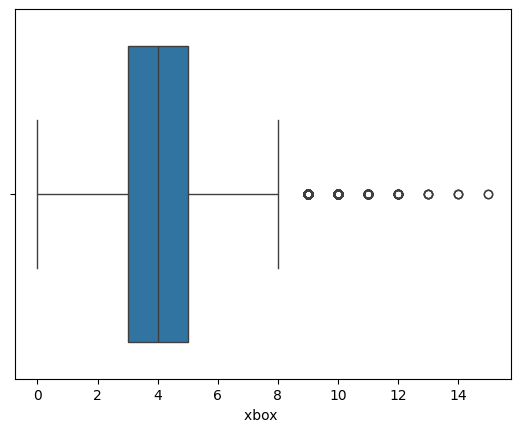

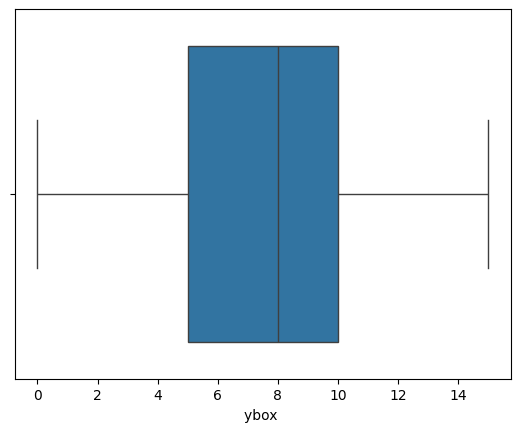

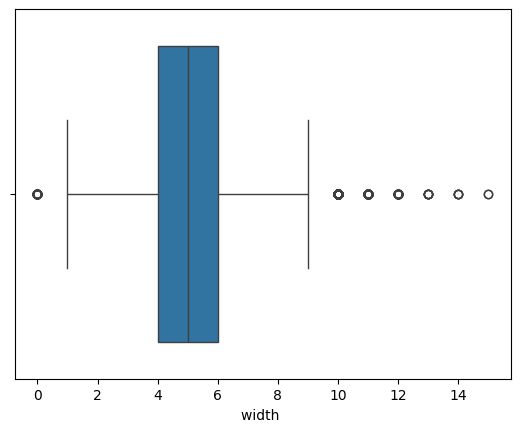

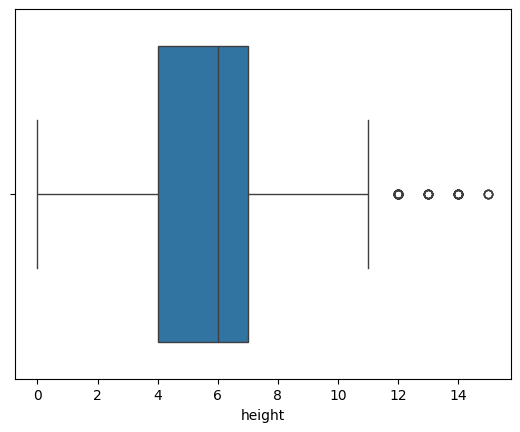

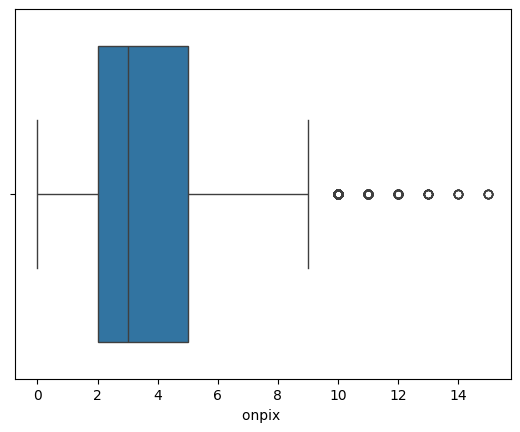

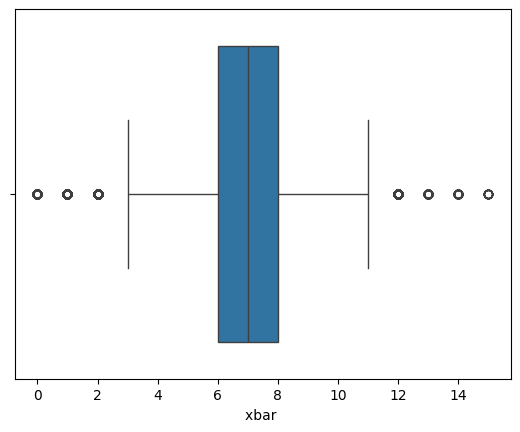

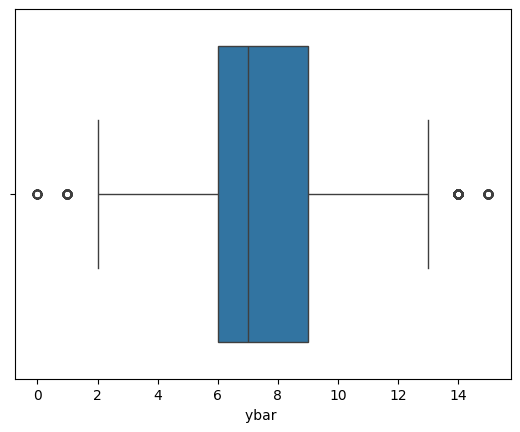

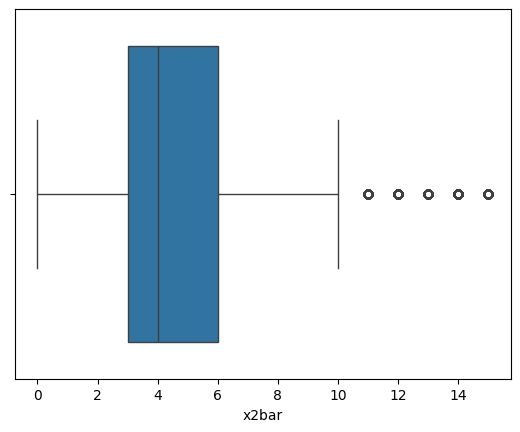

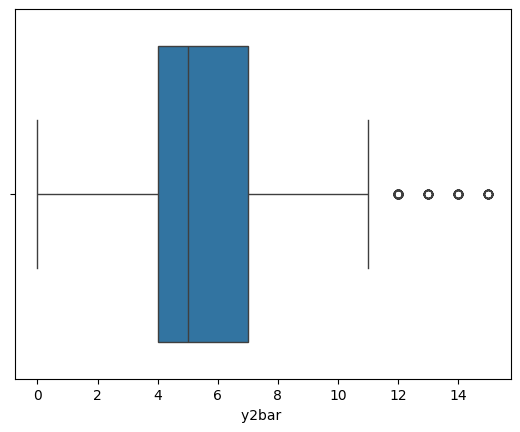

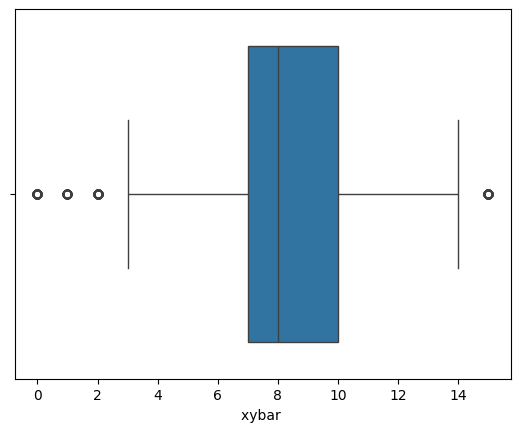

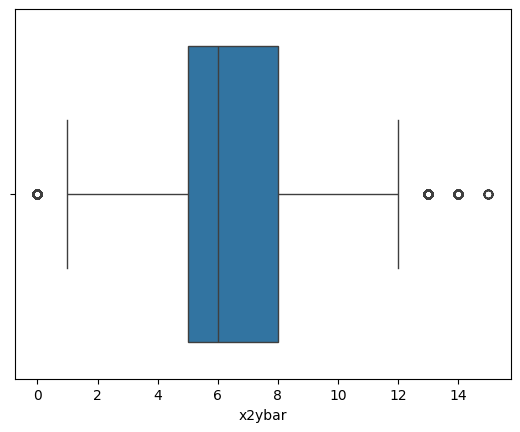

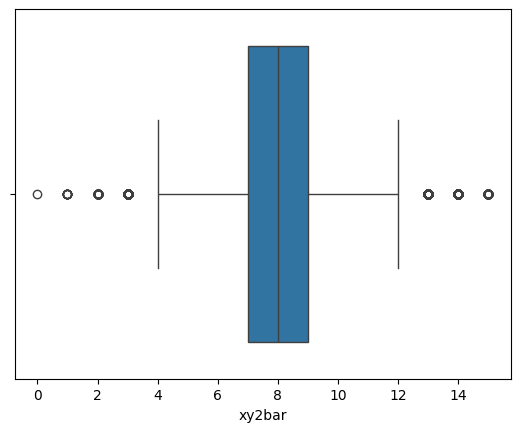

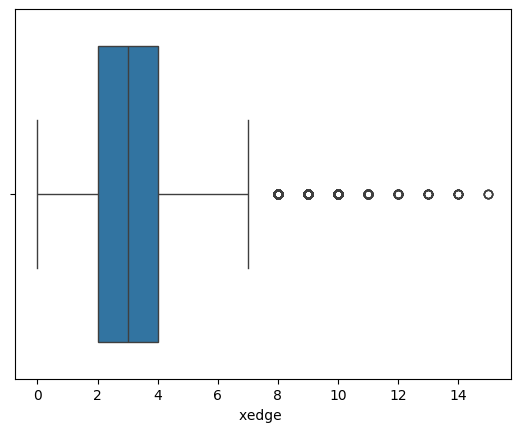

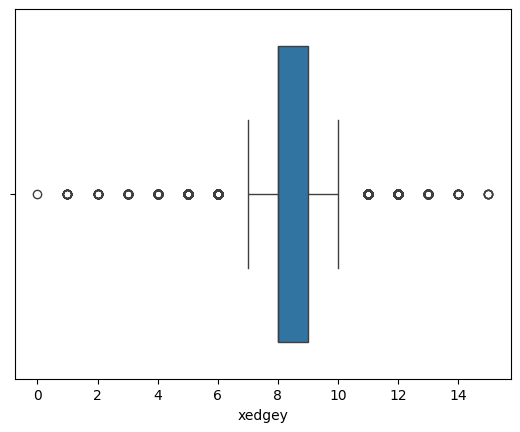

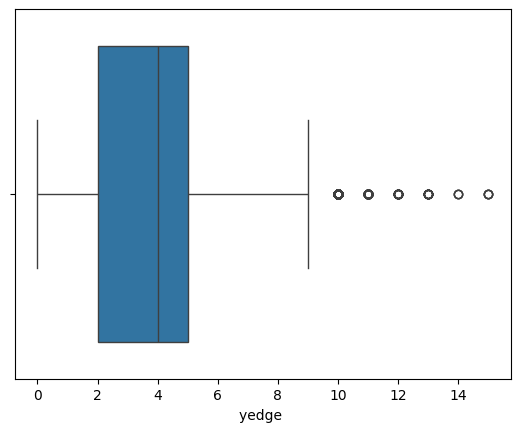

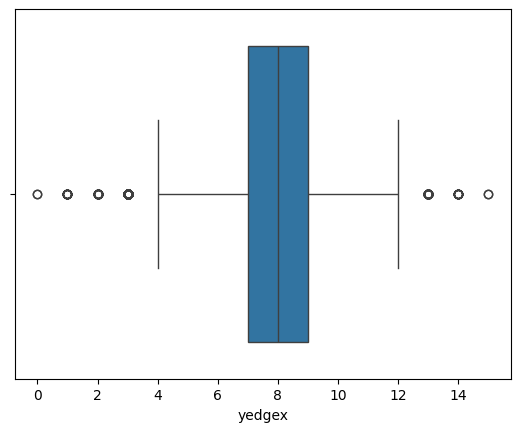

<Axes: >

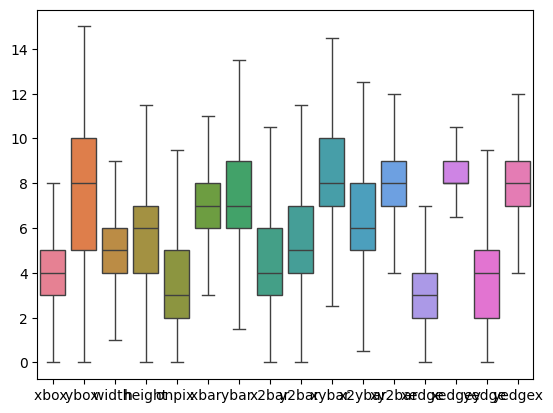

In [481]:
for columns in num_columns.columns:
  sns.boxplot(data=num_columns,x=columns)
  plt.show()
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-(1.5*iqr)
    upper_bound=Q3+(1.5*iqr)
    df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
  return df
df1=handling_outliers(df)
df1.head()
sns.boxplot(df1)

<Axes: ylabel='letter'>

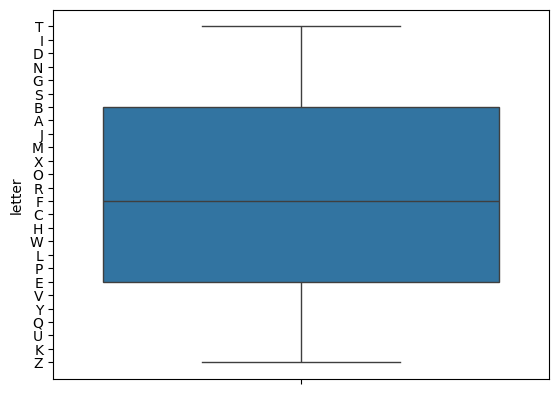

In [482]:
sns.boxplot(df['letter'])

# Correlation Heatmap

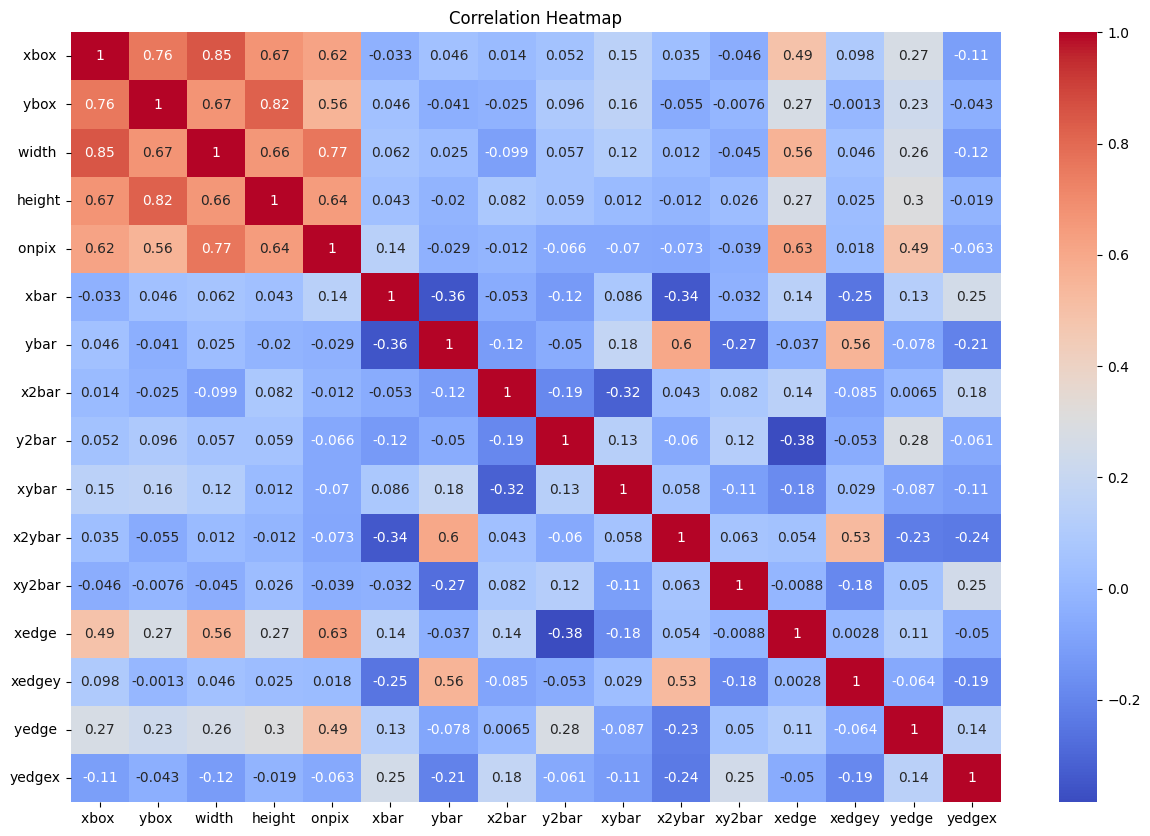

In [483]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

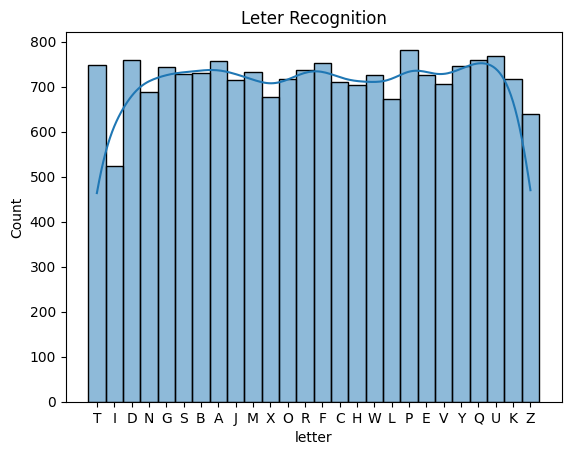

In [484]:
sns.histplot(data=df,x='letter',kde=True)
plt.title("Leter Recognition")
plt.show()

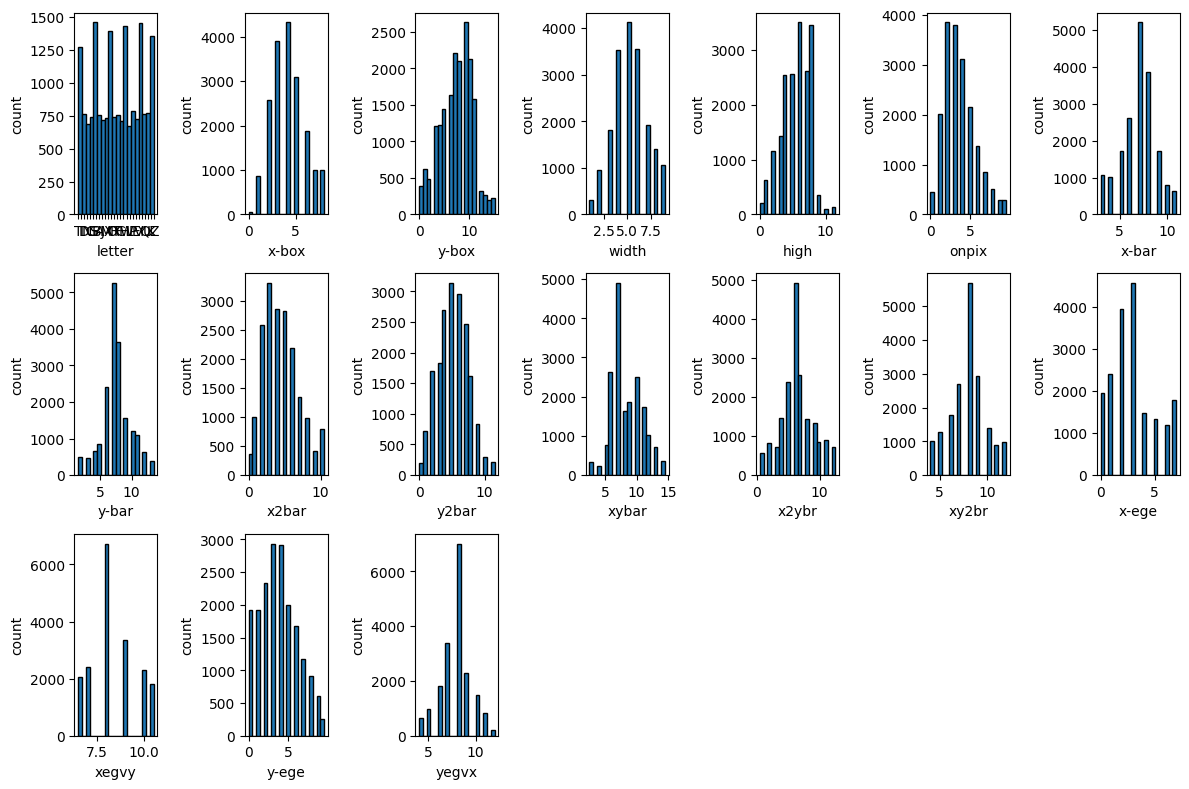

In [485]:
plt.figure(figsize=(12, 8))
columns = ["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar",
           "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
df.columns = columns
for i, column in enumerate(df.columns):
    plt.subplot(3, 7, i + 1)
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

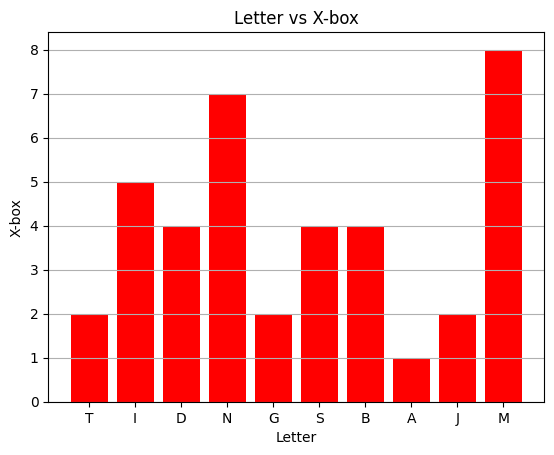

In [486]:
columns = ["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar",
           "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
df.columns = columns

x1 = df["letter"].head(10)
y1 = df["x-box"].head(10)
plt.bar(x1, y1, color="red")
plt.xlabel("Letter")
plt.ylabel("X-box")
plt.title("Letter vs X-box")
plt.grid(axis='y')
plt.show()

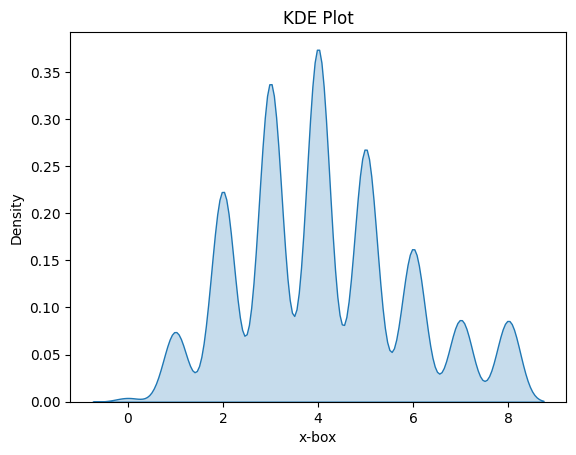

In [487]:
sns.kdeplot(x=df['x-box'],fill=True)
plt.xlabel("x-box")
plt.title("KDE Plot")
plt.show()

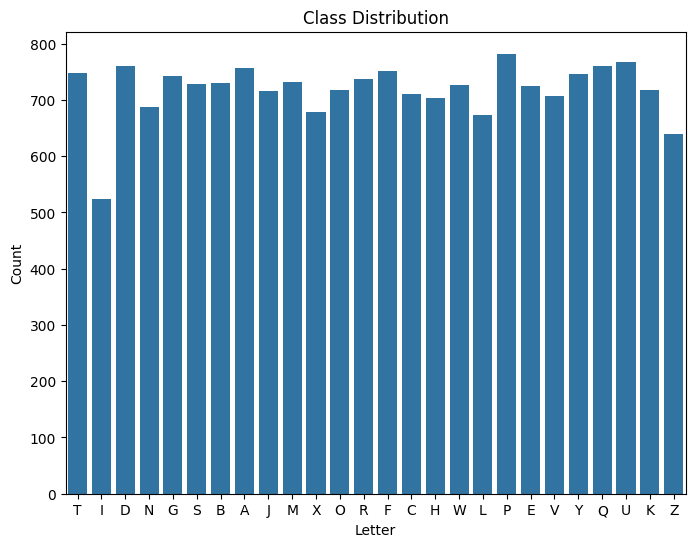

In [488]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<Axes: >

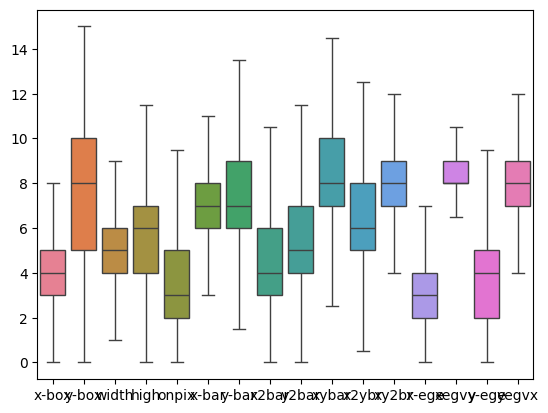

In [489]:
df1=handling_outliers(df)
df1.head(5)
df1.tail(5)
sns.boxplot(df1)

# Skewness

In [490]:
df1

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2.0,8,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,I,5.0,12,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,D,4.0,11,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,N,7.0,11,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,2.0,8.0
4,G,2.0,1,3.0,1.0,1.0,8.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,T,5.0,8,7.0,7.0,7.0,7.0,9.0,4.0,8.0,7.0,7.0,8.0,3.0,10.0,8.0,6.0
19995,D,2.0,2,3.0,3.0,2.0,7.0,7.0,7.0,6.0,6.0,6.0,4.0,2.0,8.0,3.0,7.0
19996,C,7.0,10,8.0,8.0,4.0,4.0,8.0,6.0,9.0,12.0,9.0,12.0,2.0,9.0,3.0,7.0
19997,T,6.0,9,6.0,7.0,5.0,6.0,11.0,3.0,7.0,11.0,9.0,5.0,2.0,10.5,2.0,4.0


In [491]:
df1= df.select_dtypes(include=['number'])
skew_values = df1.skew()
print(skew_values)

x-box    0.385644
y-box   -0.211625
width    0.114456
high    -0.315158
onpix    0.736655
x-bar   -0.174243
y-bar    0.068571
x2bar    0.563267
y2bar    0.085319
xybar    0.292485
x2ybr    0.203100
xy2br    0.039525
x-ege    0.507773
xegvy    0.229712
y-ege    0.359389
yegvx   -0.075499
dtype: float64


In [492]:
pt=PowerTransformer(method='yeo-johnson')
df2=pt.fit_transform(df1)
df2

array([[-1.24972137,  0.22376013, -1.22843761, ..., -0.23547614,
        -1.78499699,  0.11614688],
       [ 0.5666967 ,  1.5170358 , -1.22843761, ..., -0.23547614,
         0.20420431,  1.3877873 ],
       [ 0.02444697,  1.19048476,  0.42648044, ..., -1.14253256,
        -0.19168396,  0.74749856],
       ...,
       [ 1.53288422,  0.86596895,  1.45419737, ...,  0.56492891,
        -0.19168396, -0.50541742],
       [ 1.06659461,  0.54365942,  0.42648044, ...,  1.61090381,
        -0.6330179 , -2.29938552],
       [ 0.02444697,  0.54365942,  0.42648044, ..., -1.14253256,
        -0.6330179 ,  0.11614688]])

In [493]:
df2.shape

(18668, 16)

# Feature Selection

In [494]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [495]:
x = df1.drop("x-box", axis=1)
y = df1["x-box"]

In [496]:
selecter=SelectKBest(score_func=f_regression,k='all')
x_new=selecter.fit_transform(x,y)
selecter_features=x.columns[selecter.get_support()]
feature_score=pd.DataFrame({'Feature':x.columns,'Score':selecter.scores_})
print(feature_score)
print(selecter_features)

   Feature         Score
0    y-box  25220.614623
1    width  46682.450241
2     high  15683.123185
3    onpix  11509.148638
4    x-bar     26.761546
5    y-bar     24.363446
6    x2bar      4.543029
7    y2bar     30.772630
8    xybar    391.068371
9    x2ybr     26.529224
10   xy2br     37.258895
11   x-ege   5608.535234
12   xegvy    225.579564
13   y-ege   1370.198635
14   yegvx    172.181074
Index(['y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar',
       'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'],
      dtype='object')


In [497]:
x_selected=x[selecter_features]
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 15)
(3734, 15)
(14934,)
(3734,)


In [498]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

# Model Building

In [499]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor

In [500]:
print("\n training models")
models={
    "Random Forest":RandomForestRegressor(),
    "Linear Regression":LinearRegression(),
    "Support Vector Machine":SVR(),
    "Decision Tree":DecisionTreeRegressor()
}
result={}
for name,model in models.items():
    print(f"training {name}...")
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test)
    result[name]={
    "mae":mean_absolute_error(y_test,y_pred),
    "rmse":np.sqrt(mean_squared_error(y_test,y_pred)),
    "mse":mean_squared_error(y_test,y_pred),
    "r2":r2_score(y_test,y_pred)
}


 training models
training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


training Linear Regression...
training Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


training Decision Tree...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
